##  Development of Machine Learning Algorithms for stroke prediction


###  Installing the Required Libraries


In [2]:
#pip install imbalanced-learn --user


#pip install imblearn --user

In [3]:

#pip install dython --user



### Importing the Required Python Libraries

In [2]:
# Loading Python modules

import numpy as np
import scipy
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 10)

from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import PowerTransformer, StandardScaler
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

### Loading the Dataset

##### Reading the stroke prediction CSV dataset gotten from kaggle and isolating the dependent variable which is the stroke column.
##### Pandas was used to import the data and analyse it using descriptive statistics and data visualisation after downloading the csv file from the URL to my local disc.


In [3]:
# Load dataset from local disc (for Juypter notebook)

data = pd.read_csv('C:/Users/Joshua Giwa/Desktop/New_Desktop/YEAR_Masters_Degree/Applied Machine Learning/healthcare-dataset-stroke-data.csv')
target = data['stroke']

### Begining with Data Quality Assessment and Exploratory Data Analysis

### Viewing the dataset 

In [4]:
data


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


#### Displaying the summary information about the dataset and the first 30 rows

In [5]:
# Displaying the summary information about the dataframe
data.info()

# This displays the first 15 rows of a dataframe.
data.sample(30)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
766,23645,Female,31.00,0,0,No,Private,Rural,91.08,34.3,never smoked,0
1766,16582,Male,26.00,0,0,Yes,Private,Rural,95.57,30.7,smokes,0
294,34974,Female,22.00,0,0,No,Private,Rural,79.81,27.7,Unknown,0
3586,24961,Female,38.00,0,0,Yes,Private,Rural,107.78,25.1,never smoked,0
2636,13764,Female,74.00,0,0,Yes,Private,Urban,116.04,30.9,never smoked,0
3018,35437,Female,28.00,0,0,Yes,Private,Rural,73.39,30.8,Unknown,0
123,44033,Male,56.00,1,0,Yes,Private,Rural,249.31,35.8,never smoked,1
4576,66786,Female,53.00,0,0,Yes,Private,Rural,94.14,27.7,smokes,0
3790,72284,Female,53.00,0,0,Yes,Private,Rural,60.77,28.7,smokes,0
890,72310,Male,80.00,1,1,Yes,Self-employed,Urban,84.31,30.3,smokes,0


From the rows displayed above, we can see that there are row with NaN which means Not a Number, It is not the same as 0. Python replaces empty/missing fields in the data with "NaN".

In [6]:
# Summary statistics for numerical features
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
# Getting the length of the dataset, which informs us how many data points we have.
print(f'Length of data: {len(data)}')

Length of data: 5110


#### Recognizing columns with missing values since missing values can severely affect prediction accuracy, this step needs to be given priority. We will first count the number of missing data (or NaN values) in each feature using Pandas' isna() function.

In [8]:
# Number of missing values per column or checking null values
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Removing the Column not Required

##### Removing the "id" column, which is not needed based on the task requirement. As a result, eliminating data will remove data from the dataset that is irrelevant. It makes use of the dropna pandas function ().


In [9]:

data = data.drop(['id'], axis = 1)

### FURTHER EXPLORATORY DATA ANALYSIS (EDA)

### Pairplot showing the correlation relationship between all the variables of the data frame



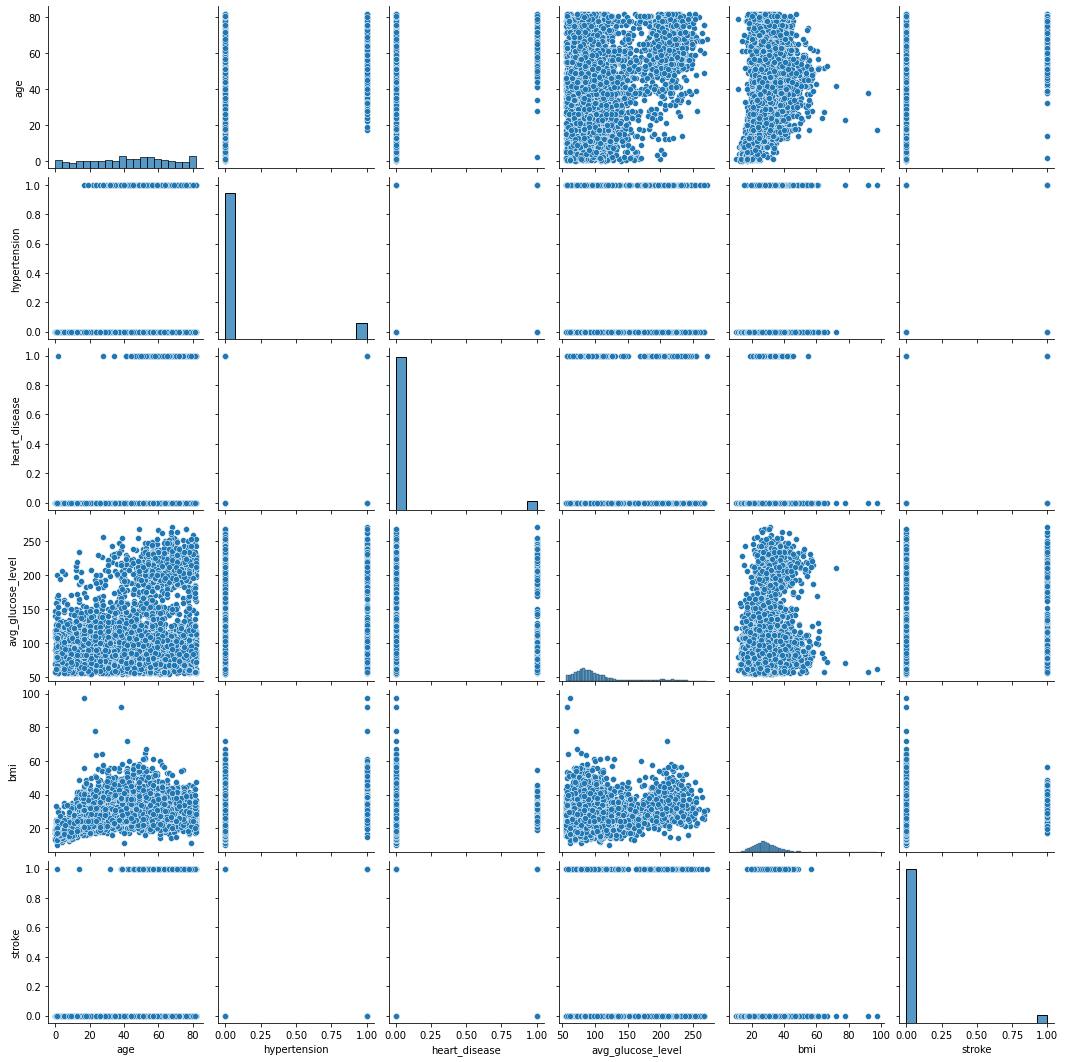

In [10]:
sns.pairplot(data)

### A plot showing the distribution of data in the dependent variable, 'target'

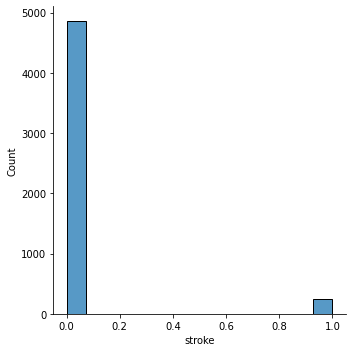

In [11]:
sns.displot(target)

It is found that there is a great imbalance in the binary target variables.

In [12]:
# positive skewness is observed meaning that the distribution of the target variable is asymetric and has a tail to the right.


print("Skewness: %f" % target.skew())

Skewness: 4.193284


In [13]:
# A positive kurtosis is observed which indicates that the tail of the skewed distribution of the target variable is very heavy
print("kurtosis: %f" % target.kurt())

kurtosis: 15.589736


<AxesSubplot:>

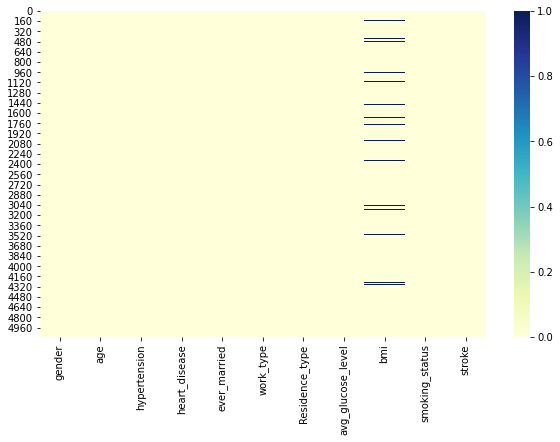

In [14]:
# The following heatmap graph depicts the missing data patterns of the first 11 features.
# The feature name is shown on the horizontal axis, while the number of observations/rows is shown on the vertical axis.
# The dark blue colour signifies missing data, whereas the cream colour represents features without missing values

plt.figure(figsize=(10,6))
sns.heatmap(data.isna(),cmap="YlGnBu")

In [22]:
num_vars = data.columns [data.dtypes != 'object']

In [23]:
print (num_vars)

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')


#### The KNNImputer is used to fill in missing values in a dataset using the k-Nearest Neighbors method. 
#### KNN algorithm is used for classification and prediction problems. 
#### The KNNImputer predicts the value of a missing value by observing trends in related columns.

In [31]:
# Select only the numeric columns and store in train_num, using fit_transform, replace empty values, 
# and then the numerical columns is converted back to a dataframe

data['bmi'].value_counts()
data['bmi'].describe()
knn = KNNImputer()

train_num = data.select_dtypes(np.number)

#train_num is the dataframe that contains the empty values that would be fitted and transformed by the knn imputer
train_num_transformed = knn.fit_transform(train_num)
train_num = pd.DataFrame(train_num_transformed, columns=train_num.columns, index=data.index)

In [18]:
numerical_feature = ['age', 'avg_glucose_level', 'bmi']

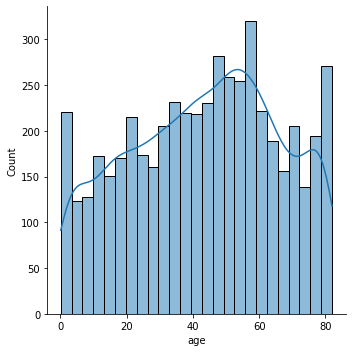

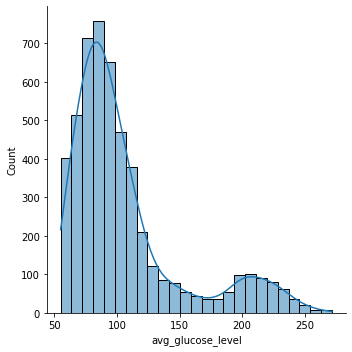

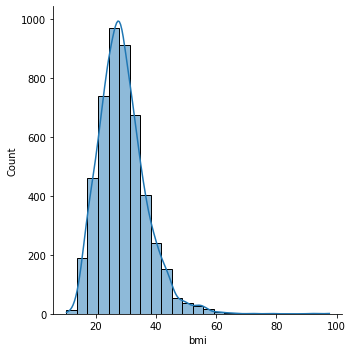

In [19]:
# A plot showing the distribution of the numerical feature

for feature in numerical_feature:
    sns.displot(data[feature], kde=True, bins=25)

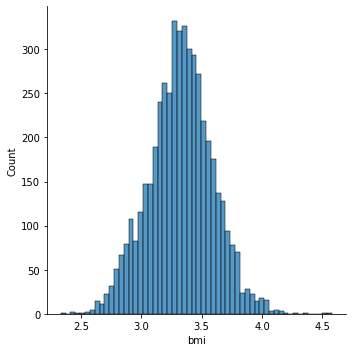

In [20]:
data['bmi'] = np.log(data['bmi'])
sns.displot(data['bmi'])

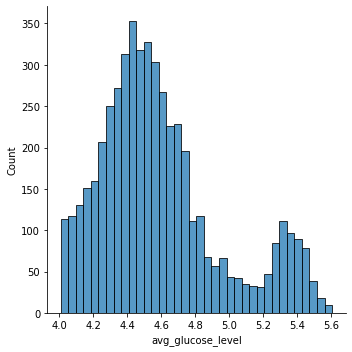

In [21]:
data['avg_glucose_level'] = np.log(data['avg_glucose_level'])
sns.displot(data['avg_glucose_level'])

In [22]:
data1 = data.loc[:, ~data.columns.isin(['hypertension', 'heart_disease', 'stroke'])]

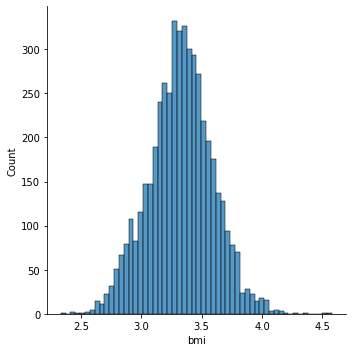

In [23]:
sns.displot(data['bmi'])

### Boxplot for all the numeric variables to observe outliers

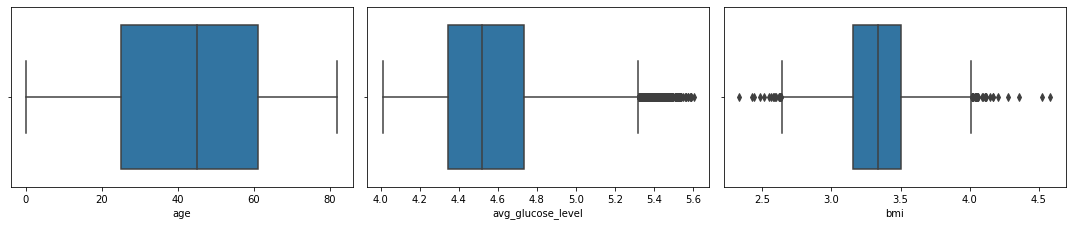

In [24]:
cols = 3
rows = 3
num_cols = data1.select_dtypes(exclude='object').columns
num_cols = num_cols
fig = plt.figure(figsize= (15,9))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot( rows, cols, i+1)
    
    sns.boxplot(x=data1[col], ax=ax)
    
fig.tight_layout()  
plt.show()

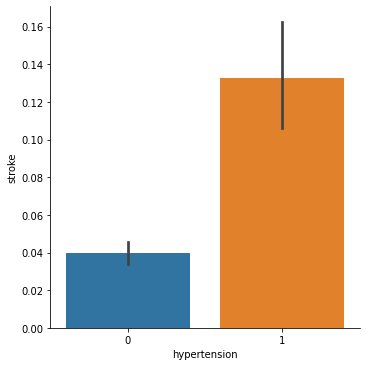

In [25]:
data2 = data
sns.catplot(x="hypertension", y="stroke", kind="bar", data=data2)

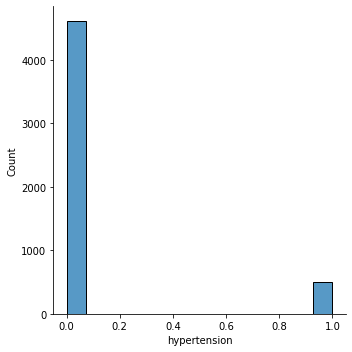

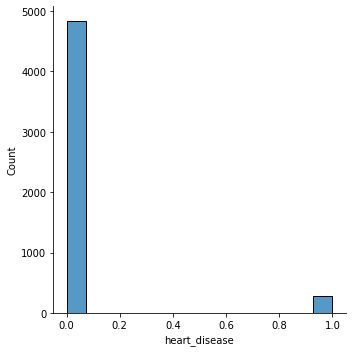

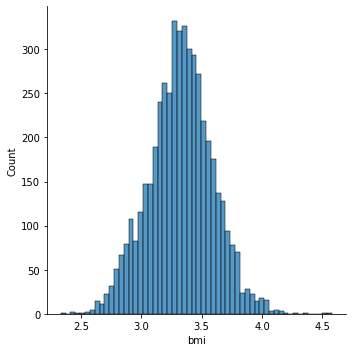

In [26]:
sns.displot(data2.hypertension)
sns.displot(data2.heart_disease)
sns.displot(data['bmi'])

##### Identifying the categorical features which is sometimes referred to as nominal data

In [27]:
categorical_features = identify_nominal_columns(data)
categorical_features

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

#### Correlation matrix to discover variables or features that correlate with each other

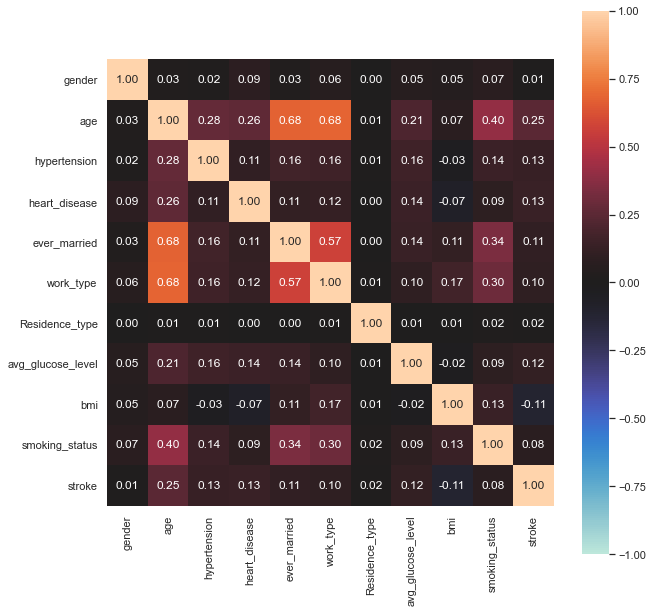

In [28]:
sns.set(font_scale = 1.0)
complete_correlation= associations(data, filename= 'complete_correlation.png', figsize=(10,10))

#### Selecting the categorical variables and store them in 'train_obj'

In [29]:

train_obj = data.select_dtypes('object')

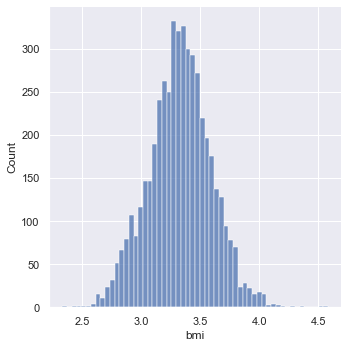

In [30]:
sns.displot(data['bmi'])

#### Combine the numerical, train_num dataframe and the categorical, train_obj dataframe in one dataframe called data

In [31]:
data = pd.concat([train_num, train_obj], axis=1)

In [32]:
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
0,67.0,0.0,1.0,228.69,36.60,1.0,Male,Yes,Private,Urban,formerly smoked
1,61.0,0.0,0.0,202.21,31.38,1.0,Female,Yes,Self-employed,Rural,never smoked
2,80.0,0.0,1.0,105.92,32.50,1.0,Male,Yes,Private,Rural,never smoked
3,49.0,0.0,0.0,171.23,34.40,1.0,Female,Yes,Private,Urban,smokes
4,79.0,1.0,0.0,174.12,24.00,1.0,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1.0,0.0,83.75,27.12,0.0,Female,Yes,Private,Urban,never smoked
5106,81.0,0.0,0.0,125.20,40.00,0.0,Female,Yes,Self-employed,Urban,never smoked
5107,35.0,0.0,0.0,82.99,30.60,0.0,Female,Yes,Self-employed,Rural,never smoked
5108,51.0,0.0,0.0,166.29,25.60,0.0,Male,Yes,Private,Rural,formerly smoked


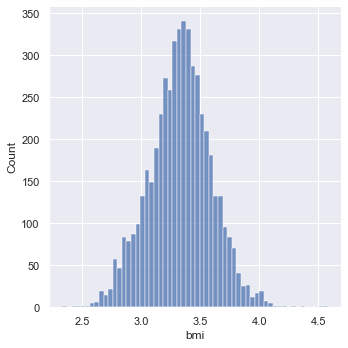

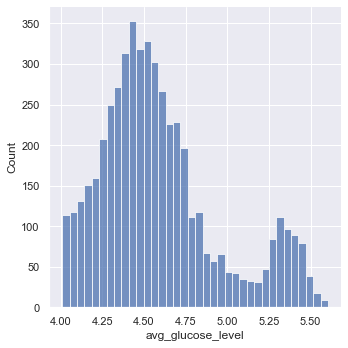

In [33]:
data['bmi'] = np.log(data['bmi'])
sns.displot(data['bmi'])
data['avg_glucose_level'] = np.log(data['avg_glucose_level'])
sns.displot(data['avg_glucose_level'])

In [34]:
data['bmi'].describe()

count    5110.000000
mean        3.330965
std         0.262385
min         2.332144
25%         3.165475
50%         3.339322
75%         3.499533
max         4.580877
Name: bmi, dtype: float64

In [35]:
data['bmi'].isnull().sum()

0

In [36]:
data.isnull().sum()

age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
gender               0
ever_married         0
work_type            0
Residence_type       0
smoking_status       0
dtype: int64

In [37]:
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
0,67.0,0.0,1.0,5.432367,3.600048,1.0,Male,Yes,Private,Urban,formerly smoked
1,61.0,0.0,0.0,5.309307,3.446171,1.0,Female,Yes,Self-employed,Rural,never smoked
2,80.0,0.0,1.0,4.662684,3.481240,1.0,Male,Yes,Private,Rural,never smoked
3,49.0,0.0,0.0,5.143008,3.538057,1.0,Female,Yes,Private,Urban,smokes
4,79.0,1.0,0.0,5.159745,3.178054,1.0,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1.0,0.0,4.427836,3.300271,0.0,Female,Yes,Private,Urban,never smoked
5106,81.0,0.0,0.0,4.829912,3.688879,0.0,Female,Yes,Self-employed,Urban,never smoked
5107,35.0,0.0,0.0,4.418720,3.421000,0.0,Female,Yes,Self-employed,Rural,never smoked
5108,51.0,0.0,0.0,5.113733,3.242592,0.0,Male,Yes,Private,Rural,formerly smoked


In [38]:
data['avg_glucose_level'].describe()

count    5110.000000
mean        4.592465
std         0.361985
min         4.009513
25%         4.346982
50%         4.520538
75%         4.736988
max         5.604846
Name: avg_glucose_level, dtype: float64

#### Vertical bar chart to show the distribution of unique categories in the categorical variables

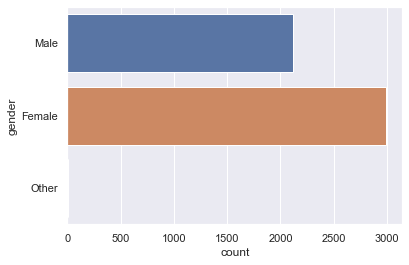

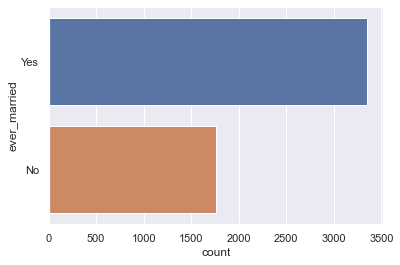

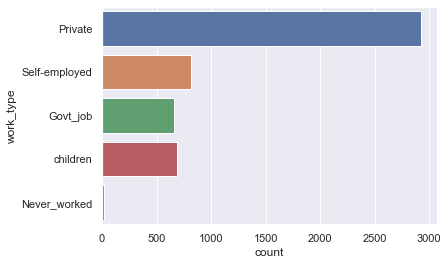

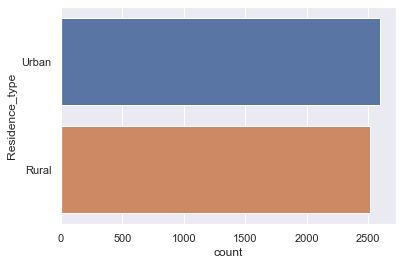

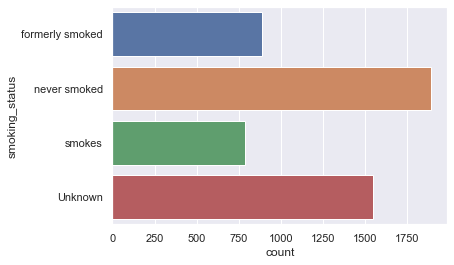

In [39]:
for col in train_obj:
    if train_obj[col].nunique() <= 22:
        sns.countplot(y=col, data=train_obj)
        plt.show()

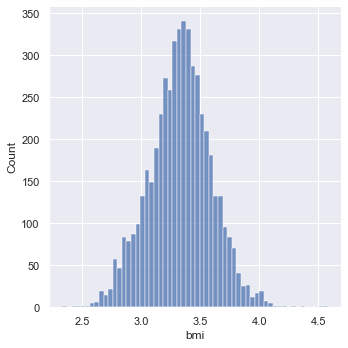

In [40]:
sns.displot(data['bmi'])

#### One hot encoding to convert all categorical variables to binary vectors

In [41]:
#### In order to do this, the categorical values must first be converted to integer numbers. 
#### The index of the integer, which is denoted with a 1, 
#### is then used to represent each integer value as a binary vector with all other values being zero.

data = pd.get_dummies(data)
data_3 = data
data_3

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0.0,1.0,5.432367,3.600048,1.0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0.0,0.0,5.309307,3.446171,1.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0.0,1.0,4.662684,3.481240,1.0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0.0,0.0,5.143008,3.538057,1.0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1.0,0.0,5.159745,3.178054,1.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1.0,0.0,4.427836,3.300271,0.0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0.0,0.0,4.829912,3.688879,0.0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0.0,0.0,4.418720,3.421000,0.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0.0,0.0,5.113733,3.242592,0.0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


#### Transfering all data in the columns except stroke column in the variable X

In [42]:
X = data.loc[:,data.columns != 'stroke']

In [43]:
feature_names = X.columns

In [44]:
feature_names

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

#### Transfering the content of the target column to Y variable

In [45]:
y = target


In [46]:
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0.0,1.0,5.432367,3.600048,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0.0,0.0,5.309307,3.446171,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0.0,1.0,4.662684,3.481240,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0.0,0.0,5.143008,3.538057,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1.0,0.0,5.159745,3.178054,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1.0,0.0,4.427836,3.300271,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0.0,0.0,4.829912,3.688879,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0.0,0.0,4.418720,3.421000,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0.0,0.0,5.113733,3.242592,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0


#### Spliting X and Y dataframes into 75%train dataset and 25% test deataset

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 12)

#### Synthetic Minority Oversampling Technique, or SOMTE, is a method for evenly boosting the dataset's case number.
#### This method aids in resolving the issue of overfitting brought on by random oversampling.

In [48]:
# Balancing the imbalanced y_train and x_train using SMOTE() function and storing the result in y_train_3 and x_train_3
smote = SMOTE(random_state = 14)
X_train_3, y_train_3 = smote.fit_resample(X_train, y_train)

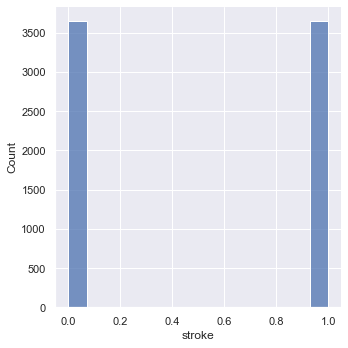

In [49]:
sns.displot(y_train_3)

#### Creating an object 'rf' of the RandomForestRegressor class and using it to fit the x-train_3 and y_train_3

In [50]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train_3, y_train_3)

RandomForestRegressor()

#### A horizontal bar plot showing the importance of the features

<AxesSubplot:>

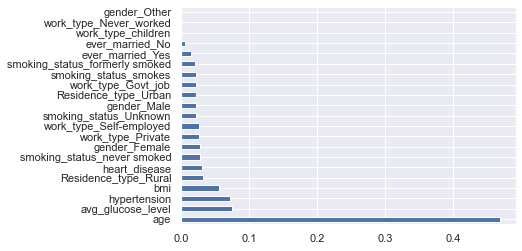

In [51]:
(pd.Series(rf.feature_importances_, index = X.columns).nlargest(21).plot(kind = 'barh'))

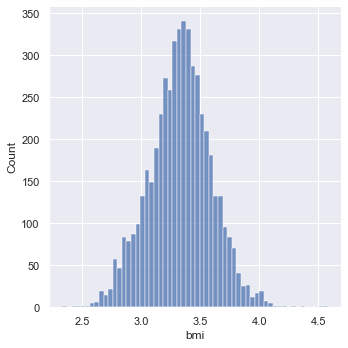

In [52]:
sns.displot(data['bmi'])

In [53]:
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0.0,1.0,5.432367,3.600048,1.0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0.0,0.0,5.309307,3.446171,1.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0.0,1.0,4.662684,3.481240,1.0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0.0,0.0,5.143008,3.538057,1.0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1.0,0.0,5.159745,3.178054,1.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1.0,0.0,4.427836,3.300271,0.0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0.0,0.0,4.829912,3.688879,0.0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0.0,0.0,4.418720,3.421000,0.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0.0,0.0,5.113733,3.242592,0.0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


#### Transfering all columns in the data dataframe except the stroke column and storing it in balanced_x dataframe

In [63]:
balanced_X = data.loc[:,data.columns != 'stroke']
print (type(balanced_X))

<class 'pandas.core.frame.DataFrame'>


#### Transfering stroke column into series balanced_y

In [64]:
balanced_y = data['stroke']
print (type(balanced_y))


<class 'pandas.core.series.Series'>


#### A plot showing the distribution of data in the dependent variable, 'y_train'

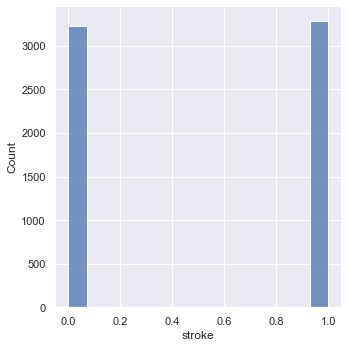

In [68]:
sns.displot(y_train)

#### the random oversampler class is imported from the imblearn.over_sampling
#### an object of the RandomOverSampler class is created and stored in the variable OS
#### using the fit_resample method of the RandomOverSampler class, resample balanced_X, 
#### and Balanced y such that the lesser data is duplicated to match the amount of the more aboundant data in 
#### both balanced_X and balanced_Y

In [69]:
from imblearn.over_sampling import RandomOverSampler
OS=RandomOverSampler()
from collections import Counter
X_os,y_os=OS.fit_resample(balanced_X,balanced_y)

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_os,y_os,test_size=0.33,random_state=10)

##### StandardScaler library is imported from sklearn.preprocessing in order to reduce 
###### all the numeric values of x_train to the same scale i.e values between 0s and 1s

In [71]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

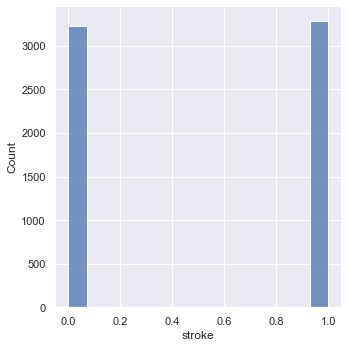

In [72]:
sns.displot(y_train)

#### Creating an object 'logreg' of the LogisticRegressor class and using it to fit the x-train_scaled and y_train_scaled

In [76]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)

#### Confusion matrix showing a true positive value of 10 and true negative of 1197, false positive of 56 and false negative of 15

In [77]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1203,  430],
       [ 281, 1295]], dtype=int64)

#### A heatmap showing the previously seen confusion matrix

Text(0.5, 257.44, 'Predicted label')

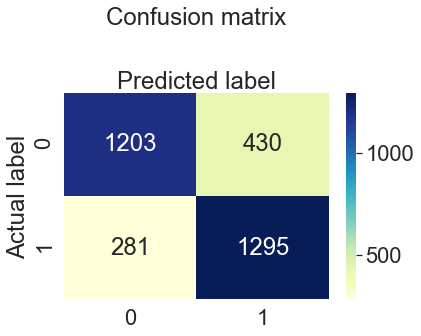

In [78]:
class_names=[0,1] # name  of classes
sns.set(font_scale = 2.0)
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
label_font = {'size': '16'}
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.3)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [79]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.77843564973512
Precision: 0.7507246376811594
Recall: 0.8217005076142132


In [80]:
print("F1_score:",metrics.f1_score(y_test, y_pred))

F1_score: 0.7846107240230232


C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


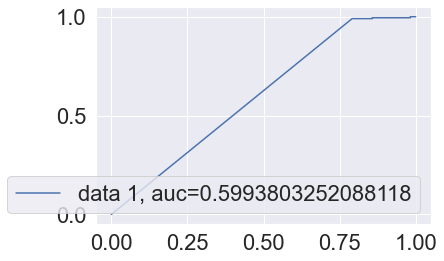

In [81]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [82]:
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_rf)
cnf_matrix

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


array([[1600,   33],
       [   0, 1576]], dtype=int64)

In [83]:
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0.0,1.0,5.432367,3.600048,1.0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0.0,0.0,5.309307,3.446171,1.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0.0,1.0,4.662684,3.481240,1.0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0.0,0.0,5.143008,3.538057,1.0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1.0,0.0,5.159745,3.178054,1.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1.0,0.0,4.427836,3.300271,0.0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0.0,0.0,4.829912,3.688879,0.0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0.0,0.0,4.418720,3.421000,0.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0.0,0.0,5.113733,3.242592,0.0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [84]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision:",metrics.precision_score(y_test, y_pred_rf))
print("Recall:",metrics.recall_score(y_test, y_pred_rf))

Accuracy: 0.9897164225615457
Precision: 0.9794903666873834
Recall: 1.0


In [85]:
print("F1_score:",metrics.f1_score(y_test, y_pred_rf))

F1_score: 0.9896389324960754
